# 5장. 서포트 벡터 머신

**서포트 벡터 머신(SVM, Support Vector Machine)** 은 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델이다.

ML에서 가장 인기있는 모델에 속하고, 머신러닝에 관심이 있는 사람이라면 반드시 알고 있어야 하는 모델이다. SVM은 특히 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합하다.

이 장에서는 SVM의 핵심 개념을 설명하고 사용 방법과 작동 원리를 살펴보겠다.

<br><br>
# 1. 선형 SVM 분류

앞의 4장에서 배운 붓꽃 데이터를 예시로 들었을 때, SVM은 클래스 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각할 수 있다. 그래서 **라지 마진 분류 Large Margin Classification** 라고 한다.

도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않는다. 도로 경계에 위치한 샘플에 의해 전적으로 결정되고, 이런 샘플을 **서포트 벡터 Support Vector**라고 한다.

---

**Caution.** SVM은 특성의 스케일에 민감하다. 

특성의 스케일을 조정하면 결정 경계가 훨씬 좋아진다.

---

## 1.1 소프트 마진 분류

모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있다면 **하드 마진 분류 Hard Margin Classification**이라고 한다. 

하드 마진 분류에는 두 가지 문제점이 있는데, 데이터가 선형적으로 구분될 수 있어야 제대로 작동되며 이상치에 민감하다는 점이다.

만약 붓꽃 데이터셋에서 양쪽의 데이터셋에 이상치가 하나 섞여있다면 하드 마진을 찾을 수 없게 되고, 결정 경계도 불안정해진다.

이런 문제를 피하려면 좀 더 유연한 모델이 필요하다. 도로의 폭을 가능한 넓게 유지하는 것과 **마진 오류 Margin Violation** (샘플이 도로 중간이나 심지어 반대쪽에 있는 경우) 사이에 적절한 균형을 잘 잡아야 한다.

이를 **소프트 마진 분류 Soft Margin Classification**라고 한다.

사이킷런의 SVM 모델에서는 `C` 하이퍼파라미터를 사용해 이 균형을 조절한다. 값을 줄이면 도로의 폭이 넓어지지만 마진 오류도 커진다.

따라서 SVM 모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수도 있다.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, [2, 3]]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

위 코드는 선형 SVM 모델을 훈련시키고, C=1에 **힌지 손실 Hinge Loss** 함수를 적용한 LinearSVC 클래스를 사용한다.

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

---

**Note.** SVM 분류기는 로지스틱 회귀 분류기와는 다르게 클래스에 대한 확률을 제공하지 않는다.

사이킷런의 `LinearSVC`는 `predict_proba()` 메서드를 제공하지 않지만 `SVC` 모델은 `probability=True`로 매개변수를 지정하면 `predict_proba()` 메서드를 제공한다.

`SVC`의 probability 매개변수 기본값은 False이다.

---

다른 방법으로는 `SVC(kernel="linear", C=1)`과 같이 SVC 모델을 사용할 수 있다. 하지만 큰 훈련 세트에서는 속도가 매우 느리므로 권장하지 않는다.

또 다른 방법은 `SGDClassifier(loss="hinge", alpha=1/(m*C))`와 같이 SGDClassifier 모델을 사용하는 것이다.

이는 선형 SVM 분류기를 훈련시키기 위해 일반적인 확률적 경사 하강법을 적용한다. 

LineaerSVC만큼 빠르지는 않지만 데이터셋이 아주 커서 메모리에 적재할 수 없거나 (외부 메모리 훈련), 온라인 학습으로 분류 문제를 다룰 때는 유용하다.

---

**Tip.** `LinearSVC`는 규제에 편향을 포함시킨다. 그래서 훈련 세트에서 평균을 빼서 중앙에 맞춰야 한다. `StandardScaler`를 사용하여 데이터 스케일을 맞추면 자동으로 이렇게 된다.

그리고 loss 매개변수를 "hinge"로 지정해야 한다. 마지막으로 훈련 샘플보다 특성이 많지 않다면 `dual` 매개 변수를 False로 지정해야 한다.

---



# 2. 비선형 SVM 분류

선형 SVM 분류기가 효율적이고 많은 경우에 아주 잘 작동하지만, 선형적으로 분류할 수 없는 데이터셋이 많다.

비선형 데이터셋을 다루는 한 가지 방법은 다항 특성과 같은 특성을 더 추가하는 것이다. 이렇게 하면 선형적으로 구분되는 데이터셋이 만들어질 수 있다.

`moons` 데이터셋에 이를 적용해보자. (사이킷런의 `make_moons` 함수를 사용해서 만든 두 개의 반달 모양 데이터셋이다.)

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000))
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=2000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

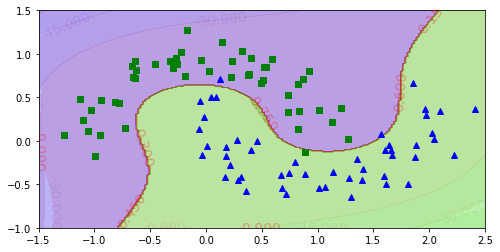

In [51]:
import matplotlib.pyplot as plt

def plot_svm(model, X, y, figsize=(8, 4)):
    x0, x1 = np.meshgrid(
        np.linspace(-1.5, 2.5, 200),
        np.linspace(-1, 1.5, 200)
    )

    decision_boundary = model.decision_function(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
    y_predict = model.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

    plt.figure(figsize=figsize)
    plt.plot(X[(y==0),0], X[(y==0),1], 'gs')
    plt.plot(X[(y==1),0], X[(y==1),1], 'b^')

    contour_1 = plt.contourf(x0, x1, decision_boundary, cmap=plt.cm.brg, alpha=0.1)
    plt.clabel(contour_1, inline=1, fontsize=14)

    contour_2 = plt.contourf(x0, x1, y_predict, cmap=plt.cm.brg, alpha=0.3)
    plt.clabel(contour_2, inline=1, fontsize=14, colors='red')

    plt.show()
    
plot_svm(polynomial_svm_clf, X, y)

## 2.1 다항식 커널

다항식 특성을 추가하는 것은 간단하고, 모든 ML 알고리즘에서 잘 작동한다.

하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 만든다.

다행히도 SVM을 사용할 땐 **커널 트릭 Kernel Trick**이라는 거의 기적에 가까운 수학적 기교를 적용할 수 있다.

실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다. 또한 사실은 어떠한 특성도 추가하지 않기 때문에 엄청난 수의 특성 조합이 생기지 않는다.

이 기법은 SVC 파이썬 클래스에 구현되어 있다.

In [49]:
from sklearn.svm import SVC

poly_kernel_svm_clf_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly_kernel_svm_clf_1.fit(X, y)
poly_kernel_svm_clf_2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

이 코드는 3차 다항식 커널을 사용해 SVM 분류기를 훈련시킨다. 모델이 과대적합이라면 다항식의 차수를 줄여야 하고, 과소적합이라면 차수를 늘려야 한다.

매개변수 `coef0`는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절한다. 

차수가 높을수록 1보다 작은 값과 1보다 큰 값의 차이가 크게 벌어지므로 coef0을 적절한 값으로 지정하면 고차항의 영향을 줄일 수 있다.


---

**Tip.** 적절한 하이퍼파라미터를 찾는 일반적인 방법은 그리드 탐색을 사용하는 것이다.

처음에는 그리드의 폭을 크게 하여 빠르게 검색하고, 그다음에는 최적의 값을 찾기 위해 그리드를 세밀하게 검색한다.

하이퍼파라미터의 역할을 잘 알고 있으면 파라미터 공간에서 올바른 지역을 탐색하는 데 도움이 된다.

---

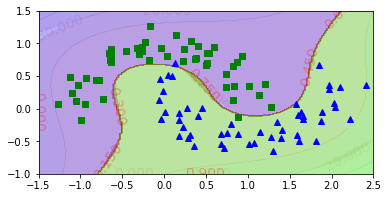

In [53]:
plot_svm(poly_kernel_svm_clf_1, X, y, (6, 3))

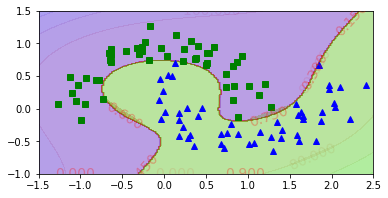

In [54]:
plot_svm(poly_kernel_svm_clf_2, X, y, (6, 3))

<br>

## 2.2 유사도 특성 추가 


비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 **랜드마크 Landmark**와 얼마나 닮았는지 측정하는 **유사도 함수 Similarity Function**로 계산한 특성을 추가하는 것이다.

예를 들어 앞에서 본 1차원 데이터셋에 두 개의 랜드마크 $x_1=-2$와 $x_1=1$을 추가한다. 그리고 $\gamma=0.3$인 가우시안 **방사 기저 함수 RBF, Radial Basis Function**를 유사도 함수로 정의한다.

$$ \phi_\gamma(X, l) = exp(-\gamma ||X-l||^2) $$

이 함수의 값은 0 (랜드마크에서 아주 멀리 떨어진 경우)부터 1 (랜드마크와 같은 위치일 경우)까지 변화하며 종 모양으로 나타난다.

위 식에서 $l$이 랜드마크 지점이 된다. $\gamma$는 0보다 커야 하며 값이 작을수록 폭이 넓은 종 모양이 된다.

이제 $x_1=-1$ 샘플을 통해 새로운 특성을 만들어보자. 이 샘플은 첫 번째 랜드마크에서 1만큼 떨어져 있고, 두 번째 랜드마크에서 2만큼 떨어져 있다.

그러므로 새로 만든 특성은 0.74와 0.3이 된다.

In [59]:
X_small[y_small==1]

array([-4., -3.,  3.,  4.])

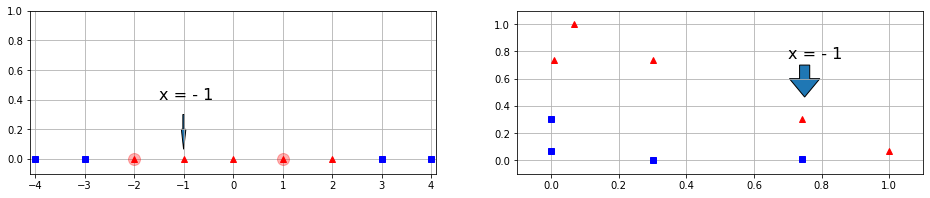

In [126]:
X_small = np.linspace(-4, 4, 9)
y_small = np.array([1, 1, 0, 0, 0, 0, 0, 1, 1])

plt.figure(figsize=(16, 3))

plt.subplot(1, 2, 1)
plt.grid(True, which='both')
plt.axis([-4.1, 4.1, -0.1, 1])
plt.plot(X_small[y_small==1], [0] * len(X_small[y_small==1]), 'bs')
plt.plot(X_small[y_small==0], [0] * len(X_small[y_small==0]), 'r^')
plt.plot([-2, 1], [0, 0], 'ro', alpha=0.3, markersize=12)
plt.arrow(-1, 0.3, 0, -0.1, width=0.03)
plt.text(-1.5, 0.4, "x = - 1", fontsize=16)

plt.subplot(1, 2, 2)
plt.grid(True, which='both')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.plot(np.exp(-0.3 * np.abs(X_small[y_small==1]-(-2)) ** 2), np.exp(-0.3 * np.abs(X_small[y_small==1]-(1)) ** 2), 'bs')
plt.plot(np.exp(-0.3 * np.abs(X_small[y_small==0]-(-2)) ** 2), np.exp(-0.3 * np.abs(X_small[y_small==0]-(1)) ** 2), 'r^')
plt.arrow(0.75, 0.7, 0, -0.1, width=0.03)
plt.text(0.7, 0.75, "x = - 1", fontsize=16)

plt.show()

그림에서 볼 수 있듯이 이제는 선형적으로 구분이 가능해졌다.

그럼 랜드마크를 어떻게 선택할까? 간단한 방법은 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정하는 것이다.

이렇게 하면 차원이 매우 커지고 따라서 변환된 훈련 세트가 선형적으로 구분될 가능성이 높다. 단점은 훈련 세트에 있는 n개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 개의 샘플로 변환된다는 것이다. (원본 특성은 제외한다고 가정한다.)

훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성이 만들어진다.

<br>

## 2.3 가우시안 RBF 커널

다항 특성 방식과 마찬가지로 유사도 특성 방식도 ML 알고리즘에 유용하게 사용될 수 있다. 추가 특성을 모두 계산하려면 연산 비용이 많이 드는데 특히 훈련 세트가 클 경우 더 그렇다.

하지만 커널 트릭이 한 번 더 SVM의 마법을 만들 수 있다. 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 실제 특성을 추가하지 않고도 얻을 수 있는 것이다.


In [127]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

gamma를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아진다. 결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어진다.

반대로 작은 gamma 값은 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워진다.

결국 하이퍼파라미터 $\gamma$가 규제의 역할을 한다. 모델이 과대적합일 경우엔 감소시켜야하고 과소적합일 경우엔 증가시켜야 한다.

다른 커널도 있지만 거의 사용되지 않는다. 예를 들어 어떤 커널은 특정 데이터 구조에 특화되어 있고, **문자열 커널 String Kernel**이 가끔 텍스트 문서나 DNA 서열을 분류할 때 사용된다.

(문자열 서브시퀀스 커널, 레벤슈타인 거리 기반의 커널)

---

**Tip.** 여러 가지 커널 중 어떤 것을 사용해야 할까? 경험적으로 봤을 때 언제나 선형 커널을 가장 먼저 시도해봐야 한다. (LinearSVC가 SVC(kernel="linear")보다 빠르다는 것을 기억하자.)

특히 훈련 세트가 아주 크거나 특성 수가 많을 경우에 그렇다. 훈련 세트가 너무 크지 않다면 가우시안 RBF 커널을 시도해보면 좋다. 대부분의 경우 잘 들어맞기 때문이다.

시간과 컴퓨팅 성능이 충분하다면 교차 검증과 그리드 탐색을 사용해 다른 커널을 좀 더 시도해볼 수 있다.

---


## 2.4 계산 복잡도

`LinearSVC` 파이썬 클래스는 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 한다. 

커널 트릭을 지원하지는 않지만 훈련 샘플과 특성 수에 거의 선형적으로 늘어난다. 훈련 시간 복잡도는 대략 $O(m \times n)$ 정도이다.

정밀도를 높이면 알고리즘의 수행 시간이 길어지는데, 이는 허용오차 하이퍼파라미터 $\epsilon$으로 조절한다. (사이킷런에서는 매개변수 tol)

대부분의 분류 문제는 허용 오차를 기본값으로 두면 잘 작동한다.

`SVC`는 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 한다. 시간 복잡도는 보통 $O(m^2 \times n)$과 $(Om^3 \times n)$ 사이이다.

이는 훈련 샘플 수가 커지면 엄청나게 느려진다는 것을 의미한다. 따라서 복잡하지만 작거나 중간 규모의 훈련 세트에 잘 맞다.

특성의 개수의 경우, 특히 **희소 특성 Sparse Features**인 경우에는 잘 확장된다. 

# 3. SVM 회귀

앞서 이야기한 것처럼 SVM 알고리즘은 다목적으로 사용할 수 있다. 선형, 비선형 분류뿐만 아니라 선형, 비선형 회귀에도 사용할 수 있다.

회귀에 적용하는 방법은 목표를 반대로 하는 것인데, 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신, 제한된 마진 오류(즉, 도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습한다.

여기서 더 자세한 내용들은 생략한다.

# 4. SVM 이론

그렇다면 SVM의 예측은 어떻게 이뤄지고, 훈련 알고리즘은 어떻게 작동할까? 먼저 선형 SVM 분류기부터 알아보자.

여기서 편항을 $b$라 하고, 특성의 가중치 벡터를 $w$라고 하자. 따라서 입력 특성 벡터에 편향을 위한 특성이 추가되지 않는다.

## 4.1 결정 함수와 예측

선형 SVM 분류기 모델은 단순히 결정 함수 $w^T x + b = w_1x_1 + \dots + w_nx_n + b $를 계산해서 새로운 샘플 x의 클래스를 예측한다.

결괏값이 0보다 크거나 같으면 예측된 클래스 $\hat{y}$는 양성 클래스가 되고, 그렇지 않으면 0이 된다.

결정 경계는 결정 함수의 값이 0인 점들이고, 아이리스 데이터 셋에서 보면 두 평면의 교차점인 직선이 된다.

선형 SVM 분류기를 훈련한다는 것은 마진 오류를 하나도 발생하지 않거나 (하드 마진) 제한적인 마진 오류를 가지면서 (소프트 마진) 가능한 한 마진을 크게 하는 w와 b를 찾는 것이다.

## 4.2 목적 함수

결정 함수의 기울기를 생각해보면, 이는 가중치 벡터의 노름 $||w||$과 같다. 이 기울기를 2로 나누면 결정 함수의 값이 $\pm1$이 되는 점들이 결정 경계로부터 2배 만큼 더 멀어진다.

즉, 기울기를 2로 나누는 것은 마진에 2를 곱하는 것과 같다. 가중치 벡터 w가 작을수록 마진은 커진다.

마진 오류를 하나도 만들지 않으려면, 결정 함수가 모든 양성 훈련 샘플에서는 1보다 커야 하고 음성 훈련 샘플에서는 -1보다 작아야 한다.

여기서 말한 제약 조건을 모든 샘플에서 $t^{(i)}(w^Tx^{(i)} + b) \ge 1 $로 표현할 수 있다.

그러므로 하드 마진 선형 SVM 분류기의 목적 함수를 **제약이 있는 최적화 Constrained Optimization** 문제로 표현할 수 있다.

$$minimize\frac{1}{2}w^Tw$$

소프트 마진 분류기의 목적 함수를 구성하려면 각 샘플에 대해 **슬랙 변수 Slack Variable**를 도입해야 한다. 이는 i번째 샘플이 얼마나 마진을 위반할지 정한다.

이 문제는 두 개의 상충되는 목표를 가지고 있는데, 마진 오류를 최소화하기 위해 가능한 한 슬랙 변수의 값을 작게 만드는 것과 마진을 크게 하기 위해 $\frac{1}{2}w^Tw$를 가능한 한 작게 만드는 것이다.

여기서 하이퍼파라미터 C가 등장하고, 이는 두 목표 사이의 트레이드오프를 정의한다.

## 이 이후부터는 내용이 어렵기 때문에 생략하기로 한다. 이론 공부도 좋지만, 빠르게 도입하고자 하는 내 의지와는 상충되므로 나중에 더 깊게 공부할 때 돌아오도록 한다. 연습문제도 생략한다.





